## Census transformation

The Census Transform is a non-parametric local transform used primarily in image processing for stereo matching and optical flow. It is highly effective because it is invariant to monotonic changes in brightness (e.g., if one camera is slightly darker than the other), as it relies on the relative intensity of pixels rather than their absolute values.

### How it Works
1. **Define a Window:** Usually a $3 \times 3$ or $5 \times 5$ neighborhood around a pixel.
2. **Compare Neighbors:** For every neighbor in the window, compare its intensity to the center pixel.
3. **Binary Encoding:** 
    * If the neighbor is greater than the center, assign a bit of 1.
    * If the neighbor is less than or equal to the center, assign a bit of 0.
4. **Bitstring:** Concatenate these bits into a single binary number (or bitstring) that represents the "local structure" of the pixel.

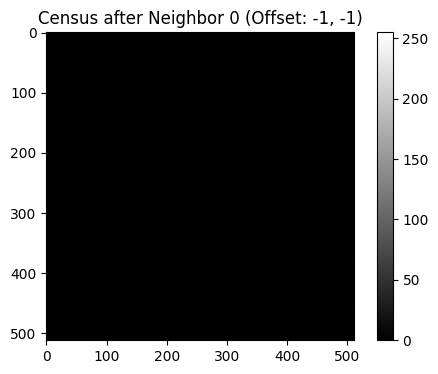

Showing census intermediate: Bit 0 added


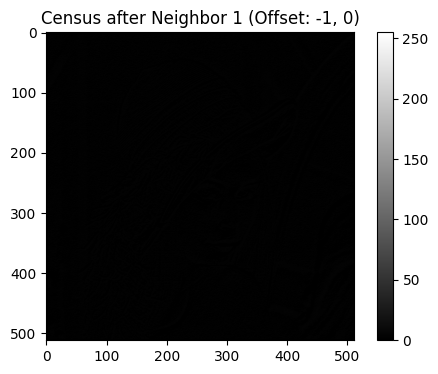

Showing census intermediate: Bit 1 added


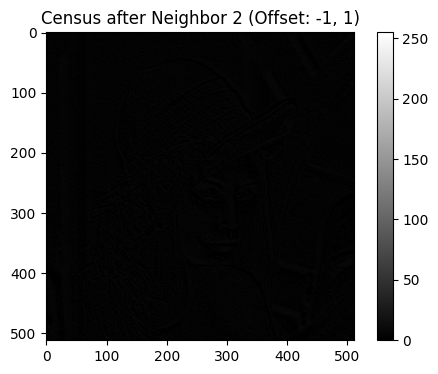

Showing census intermediate: Bit 2 added


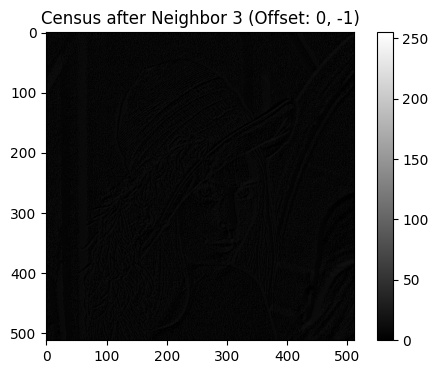

Showing census intermediate: Bit 3 added


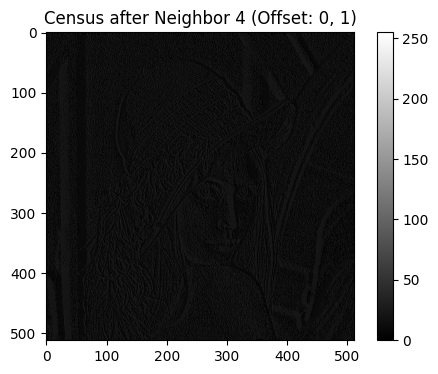

Showing census intermediate: Bit 4 added


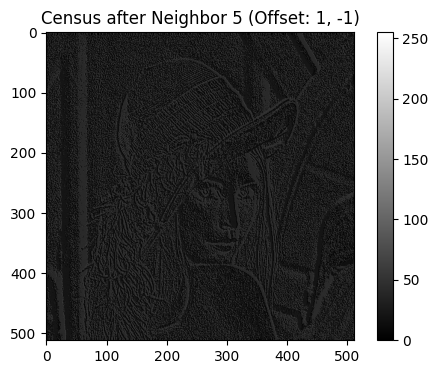

Showing census intermediate: Bit 5 added


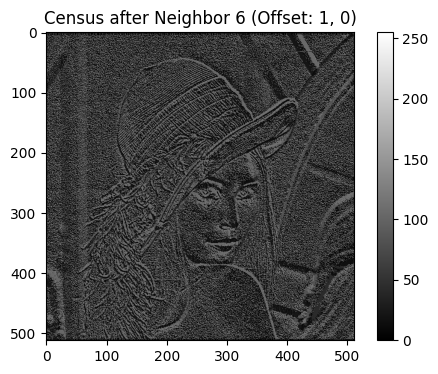

Showing census intermediate: Bit 6 added


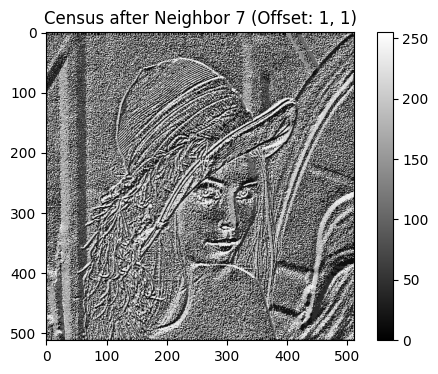

Showing census intermediate: Bit 7 added


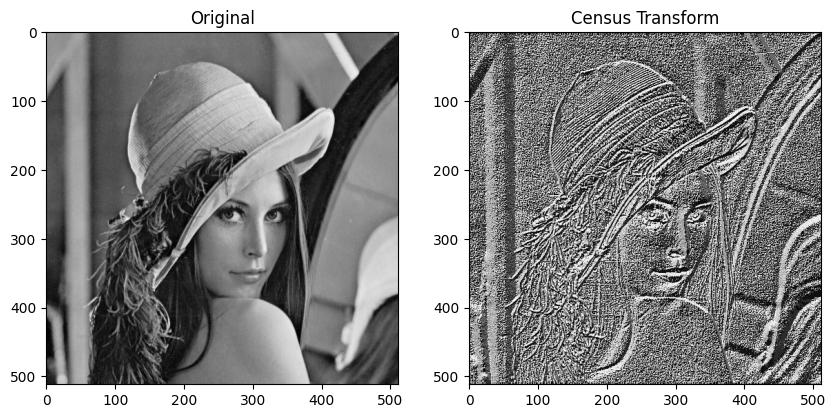

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def census_transform(img):
    rows, cols = img.shape
    # Output will store an 8-bit integer (since 3x3 has 8 neighbors)
    census = np.zeros((rows, cols), dtype=np.uint8)
    
    # Define offsets for 8 neighbors in a 3x3 window (excluding center)
    offsets = [(-1, -1), (-1, 0), (-1, 1), 
               (0, -1),            (0, 1), 
               (1, -1),  (1, 0),   (1, 1)]
    
    # Pad image to handle boundaries
    padded = np.pad(img, ((1, 1), (1, 1)), mode='reflect')
    
    for i, (dy, dx) in enumerate(offsets):
        # Extract the neighbor shifted by dy, dx
        # We compare it to the original image pixels
        neighbor_window = padded[1+dy : 1+dy+rows, 1+dx : 1+dx+cols]
        
        # If neighbor > center, set the i-th bit to 1
        # Using bitwise shift for efficiency
        census |= ((neighbor_window > img).astype(np.uint8) << i)

        # --- Visualization Code ---
        plt.figure(figsize=(6, 4))
        plt.imshow(census, cmap='gray', vmin=0, vmax=255) # Keep scale consistent
        plt.title(f"Census after Neighbor {i} (Offset: {dy}, {dx})")
        plt.colorbar()
        plt.show() # Forces the plot to render before the next iteration
        print(f"Showing census intermediate: Bit {i} added")
        # --------------------------
        
    return census

# --- Test the code ---
# 1. Load image in grayscale
image = cv2.imread('resources/lena_gray.png', cv2.IMREAD_GRAYSCALE)

# 2. Run Transform
census_result = census_transform(image)

# 3. Visualize
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.title("Original"); plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2); plt.title("Census Transform"); plt.imshow(census_result, cmap='gray')
plt.show()

# Local Binary Pattern

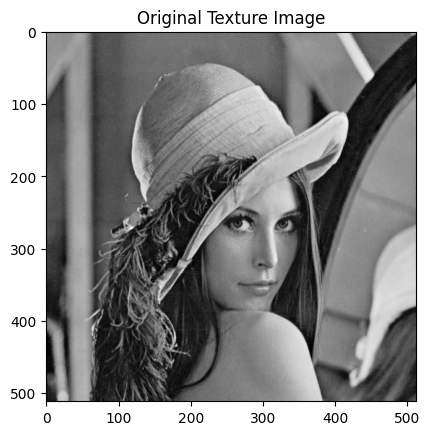

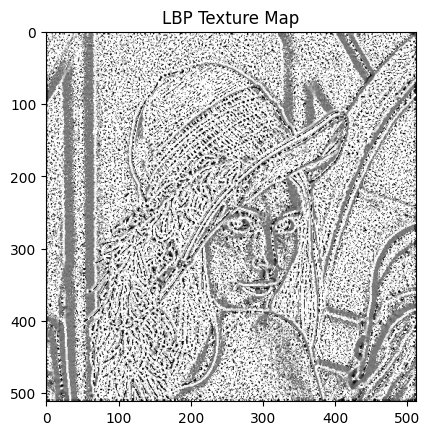

In [10]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
import matplotlib.pyplot as plt

# 1. Load a texture image
# image = data.brick()
image = cv2.imread('resources/lena_gray.png', cv2.IMREAD_GRAYSCALE)

# 2. Settings for LBP
radius = 3
n_points = 8 * radius # Number of points to sample

# 3. Compute LBP
# 'uniform' method is best for rotation invariance
lbp = local_binary_pattern(image, n_points, radius, method='uniform')

# 4. Show result
plt.imshow(image, cmap='gray')
plt.title("Original Texture Image")
plt.show()
plt.imshow(lbp, cmap='gray')
plt.title("LBP Texture Map")
plt.show()